#**DBSCAN**


#Step 1 : Import Libraries



In [ ]:
#Silhouette Coefficient:measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation) bettwne -1 and 1 while 0.5 means it's high range
#values close to +1 indicating that a sample is far away from neighboring clusters negative values suggesting that samples may have been assigned to the wrong cluster. 

#Adjusted Rand Index: to determine whether two cluster results are similar to each other statistical measure used in data clustering analysis bettween 0 and 1 
#1 indicates a perfect match  value close to 0 indicates a random assignment of data points to clusters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [40]:
X, y_true = make_blobs(n_samples=400, centers=3,cluster_std=0.50, random_state=42)

#Step 3 : Modeling The Data Using DBSCAN



In [41]:
DbsCan = DBSCAN(eps=0.9, min_samples=20).fit(X)
core_samples_mask = np.zeros_like(DbsCan.labels_, dtype=bool)
core_samples_mask[DbsCan.core_sample_indices_] = True
labels = DbsCan.labels_

In [47]:
#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


['y', 'b', 'r']


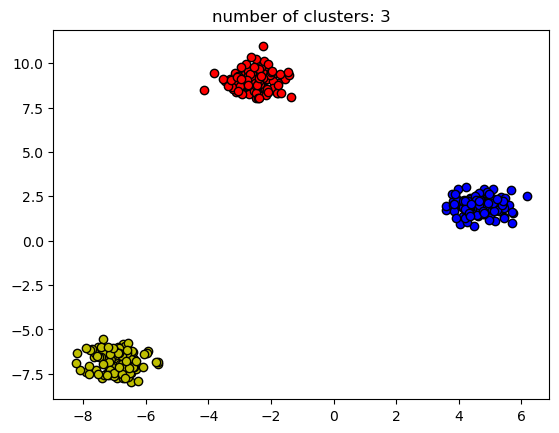

In [48]:
unique_labels = set(labels)
colors = ['y', 'b', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
#Points that are core samples of the current cluster.
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
#Points that are not core samples of the current cluster 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    
    plt.title('number of clusters: %d' % n_clusters_)
plt.show()

#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [49]:
# evaluation metrics
from sklearn import metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels) # Import adjusted_rand_score
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.92
Adjusted Rand Index: 1.00


#**Well Done :)**